> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

> With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

> <a>http://www.amstat.org/publications/jse/v19n3/decock.pdf</a>

In [1]:
%pwd

'/home/lao/notebook/HousePrices'

In [2]:
path = %pwd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# show all df columns
pd.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
df_train = pd.read_csv(path + '/train.csv')
df_test = pd.read_csv(path + '/test.csv')

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# store index for the test set for prediction
test_id = df_test["Id"]

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Dealing with Outliers

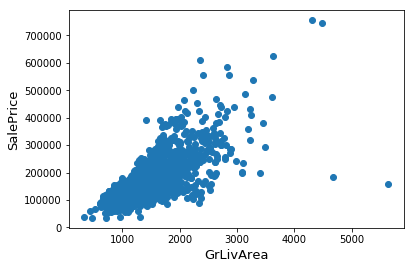

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [10]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)

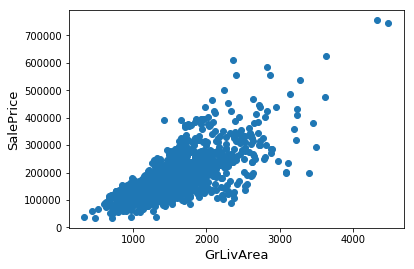

In [11]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [12]:
# Removing Id and SalePrice for merging
# Also using log of sales since evaluation would be by log of mse
df_target = np.log1p(df_train["SalePrice"])
df_train = df_train.drop(["SalePrice", "Id"], axis=1)
df_test = df_test.drop(["Id"], axis=1)

In [13]:
#df_target.to_

In [14]:
print("Training Set Shape:", df_train.shape)
print("Test Set Shape:", df_test.shape)

Training Set Shape: (1458, 79)
Test Set Shape: (1459, 79)


In [15]:
# Merging all data sets
all_df = pd.concat((df_train.loc[:, 'MSSubClass':'SaleCondition'],
                    df_test.loc[:, 'MSSubClass':'SaleCondition']))

In [16]:
all_df.shape

(2917, 79)

## Dealing with missing values


In [17]:
all_df.isnull().sum().sort_values(ascending = False)[0:40]

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
OverallQual        0
OverallCond        0
LotArea            0
Street             0
LotShape           0
LandContour        0
dtype: int64

In [18]:
# Some lot frontage not given
lf_median = all_df['LotFrontage'].median()
MSZMode = all_df['MSZoning'].mode()[0]
UtlMode = all_df['Utilities'].mode()[0]
STMode = all_df['SaleType'].mode()[0]
ElectMode = all_df['Electrical'].mode()[0]
KQMode = all_df['KitchenQual'].mode()[0]


values = {'PoolQC': "None", 
          'MiscFeature': "None", 
          "Alley": "None",
          "Fence": "None", 
          "FireplaceQu": "None", 
          "LotFrontage": lf_median,
          "GarageCond": "None", 
          "GarageQual": "None", 
          "GarageYrBlt": 0,
          "GarageFinish": "None", 
          "GarageType": "None",
          "BsmtCond": "None", 
          "BsmtExposure": "None",
          "BsmtQual": "None",
          "BsmtFinType2": "None", 
          "BsmtFinType1": "None", 
          "MasVnrType": "None",
          "MasVnrArea": 0, 
          "MSZoning": MSZMode, 
          "BsmtHalfBath": 0,
          "Utilities": UtlMode,
          "Functional": "Typ", 
          "BsmtFullBath": 0, 
          "BsmtFinSF2": 0, 
          "BsmtFinSF1": 0,
          "Exterior2nd": "Other", 
          "BsmtUnfSF": 0,
          "TotalBsmtSF": 0,
          "Exterior1st": "Other",
          "SaleType": STMode,
          "Electrical": ElectMode,
          "KitchenQual": KQMode,
          "GarageArea": 0,
          "GarageCars": 0,
          
          }

all_df.fillna(value=values, inplace=True)

## Feature Engineering

In [20]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal


In [19]:
#Create feature indicating age of house after renovation
all_df['HouseAge'] = all_df['YrSold'] - all_df['YearRemodAdd']

# Adding total sqfootage feature 
all_df['TotalSF'] = all_df['TotalBsmtSF'] + all_df['1stFlrSF'] + all_df['2ndFlrSF']

In [20]:
#all_df[['YrSold', 'YearRemodAdd']]
all_df['HouseAge'][all_df['HouseAge'] < 0]

835    -1
1089   -2
Name: HouseAge, dtype: int64

In [21]:
#change MSSUb class to object. It contains categories
all_df['MSSubClass'] = all_df['MSSubClass'].astype(np.str)

#GarageYrBuilt and month sold are transformed into categorical features.
all_df['MoSold'] = all_df['MoSold'].astype(np.str)

In [22]:
# Convert some categorial vatiables to numerical where there is order
# Give weights to Garage Quality and Garage Condition, PoolQC
replacement = {"Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0, "NA": 0}

# replacement for paved-drive
replacement_pd = {"Y": 3, "P": 2, "N": 1}

# replacement for basement finish
replacement_bsm = {"GLQ": 6, "ALQ": 5, "BLQ": 4,
                   "Rec": 3, "LwQ": 2, "Unf": 1, "None": 0, "NA": 0}

replacement_str = {"Grvl": 1, "Pave": 2}
replacament_central_air = {"N": 0, "Y": 1}

replacement_houseage = {-1: 0, -2: 0}

all_df = all_df.replace({'GarageQual': replacement, 
                         'GarageCond': replacement, 
                         'PoolQC': replacement,
                         'FireplaceQu': replacement, 
                         'PavedDrive': replacement_pd,
                         'BsmtFinType1': replacement_bsm, 
                         'BsmtFinType2': replacement_bsm, 
                         'Street': replacement_str,
                         'CentralAir': replacament_central_air, 
                         'HouseAge': replacement_houseage,
                         })

In [23]:
# Create new features
# 1* Simplifications of existing features
all_df["SimplOverallQual"] = all_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
all_df["SimplOverallCond"] = all_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
all_df["SimplPoolQC"] = all_df.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
all_df["SimplGarageCond"] = all_df.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
all_df["SimplGarageQual"] = all_df.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_df["SimplFunctional"] = all_df.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
all_df["SimplKitchenQual"] = all_df.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_df["SimplHeatingQC"] = all_df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_df["SimplBsmtFinType1"] = all_df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_df["SimplBsmtFinType2"] = all_df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_df["SimplBsmtCond"] = all_df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_df["SimplBsmtQual"] = all_df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_df["SimplExterCond"] = all_df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_df["SimplExterQual"] = all_df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


In [24]:
all_df.describe()

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,HouseAge,TotalSF,SimplOverallQual,SimplOverallCond,SimplPoolQC,SimplGarageCond,SimplGarageQual,SimplFireplaceQu,SimplBsmtFinType1,SimplBsmtFinType2
count,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.00000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,68.983888,10139.439150,1.995886,6.086390,5.564964,1971.287967,1984.248200,100.931436,3.539938,438.864930,1.273912,49.599246,560.50360,1048.967775,0.932808,1157.692492,335.861502,4.697635,1498.251628,0.428865,0.061364,1.567364,0.379842,2.860130,1.044566,6.448063,0.596160,1.766541,1870.270141,1.765513,472.247515,2.800823,2.808708,2.830648,93.629414,47.280082,23.114158,2.604045,16.073363,2.088790,0.012341,50.860816,2007.792938,23.545766,2542.521769,2.350017,2.174152,0.009599,0.951663,0.954748,0.782311,1.502571,1.025369
std,20.810549,7807.036512,0.064018,1.406704,1.113414,30.286991,20.892257,178.032499,2.113595,444.180542,0.955481,169.232130,439.69883,429.472008,0.250398,385.264298,428.119663,46.412570,496.908626,0.523943,0.245687,0.552465,0.502782,0.822967,0.214532,1.564281,0.644773,1.806293,449.826161,0.762102,214.762268,0.716089,0.712725,0.537465,126.532643,67.118965,64.263424,25.196714,56.202054,34.561371,0.230967,567.595198,1.315328,20.888537,781.071852,0.516409,0.435690,0.197490,0.241583,0.248470,0.841884,0.551600,0.282140
min,21.000000,1300.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,334.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7476.000000,2.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,1.000000,0.000000,1.000000,0.000000,220.00000,793.000000,1.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,1957.000000,1.000000,320.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,4.000000,2000.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,68.000000,9452.000000,2.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,4.000000,368.000000,1.000000,0.000000,467.00000,988.000000,1.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1.000000,1977.000000,2.000000,480.000000,3.000000,3.000000,3.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,15.000000,2448.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000
75%,78.000000,11556.000000,2.000000,7.000000,6.000000,2001.000000,2004.000000,163.000000,6.000000,733.000000,1.000000,0.000000,804.00000,1302.000000,1.000000,1384.000000,

In [25]:
#Divide features into numerical and categorical features

all_df_num = all_df.select_dtypes(include = [np.number])
#all_df_cat = all_df.select_dtypes(include = ['object'])

In [26]:
# Separate back into training and test sef
df_train = all_df_num.iloc[0:1458, :]
df_test = all_df_num.iloc[1458: , : ]

In [27]:
print("Training Set Shape:", df_train.shape)
print("Test Set Shape:", df_test.shape)

Training Set Shape: (1458, 53)
Test Set Shape: (1459, 53)


## Modelling

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)
scaler = StandardScaler()

In [30]:
param_grid = [ 
    {'n_estimators' : list(range(30, 100), 'max_features': list(range(5, 30))},
    {'bootstrap': [False], 'n_estimators' : list(range(3, 50), 'max_features':list(range(3, 20) },
    
]

grid_search = GridSearchCV(forest_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')

grid_search.fit(X, y)

SyntaxError: invalid syntax (<ipython-input-30-a29f8d512cf8>, line 2)

In [ ]:
grid_search.best_params_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [33]:
param_grid = {'n_estimators' : list(range(30, 100)), 'max_features': list(range(5, 30)), 'bootstrap': [False]}

grid_search = RandomizedSearchCV(forest_reg, param_grid, cv = 10, n_iter = 100, scoring = 'neg_mean_squared_error')

grid_search.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'bootstrap': [False]},
     

In [34]:
attributes = X.columns
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.1326924261860142, 'TotalSF'),
 (0.09808187611358343, 'SimplOverallQual'),
 (0.08430885269448392, 'OverallQual'),
 (0.0780578648044793, 'GrLivArea'),
 (0.05230708724523013, 'GarageCars'),
 (0.04932614919821037, 'YearBuilt'),
 (0.04799158969707654, 'TotalBsmtSF'),
 (0.0474982958788128, 'GarageArea'),
 (0.038516982537692944, 'GarageYrBlt'),
 (0.03640802676580898, '1stFlrSF'),
 (0.0362180501141973, 'HouseAge'),
 (0.03400109178349174, 'FullBath'),
 (0.027490992334767584, 'FireplaceQu'),
 (0.018694952365846052, 'BsmtFinSF1'),
 (0.018253011285462115, 'YearRemodAdd'),
 (0.01740688152840363, 'Fireplaces'),
 (0.01718438378743078, '2ndFlrSF'),
 (0.017169306566814296, 'LotArea'),
 (0.015067751061685048, 'TotRmsAbvGrd'),
 (0.013164351289034003, 'LotFrontage'),
 (0.010761487237335353, 'SimplFireplaceQu'),
 (0.009920572204632086, 'BsmtFinType1'),
 (0.009837214357176487, 'OpenPorchSF'),
 (0.008923072267649717, 'BsmtUnfSF'),
 (0.008721593413655467, 'OverallCond'),
 (0.008345830849099822, 'MasVnrAre

In [35]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 89}

In [36]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.13460468224156436 {'n_estimators': 82, 'max_features': 10, 'bootstrap': False}
0.13408287382363146 {'n_estimators': 46, 'max_features': 13, 'bootstrap': False}
0.13786611795557305 {'n_estimators': 94, 'max_features': 26, 'bootstrap': False}
0.13620983330787118 {'n_estimators': 86, 'max_features': 22, 'bootstrap': False}
0.13447173250893696 {'n_estimators': 81, 'max_features': 11, 'bootstrap': False}
0.13327541102050916 {'n_estimators': 83, 'max_features': 6, 'bootstrap': False}
0.13547508794067092 {'n_estimators': 96, 'max_features': 22, 'bootstrap': False}
0.13482779904680411 {'n_estimators': 68, 'max_features': 9, 'bootstrap': False}
0.13860074014779875 {'n_estimators': 40, 'max_features': 26, 'bootstrap': False}
0.13319483934554538 {'n_estimators': 94, 'max_features': 7, 'bootstrap': False}
0.13504418405248828 {'n_estimators': 44, 'max_features': 12, 'bootstrap': False}
0.13590757242340426 {'n_estimators': 43, 'max_features': 8, 'bootstrap': False}
0.13821620322026873 {'n_estimato

In [37]:
forest_reg1 = RandomForestRegressor(random_state = 0, 
                                   bootstrap =  False, 
                                   max_features = 6, 
                                   n_estimators = 89 
                                  )

In [38]:
forest_reg1.fit(X, y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=89, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [39]:
test_label = forest_reg1.predict(df_test)

## Sumission

In [40]:
test_label

array([11.69017322, 11.92730083, 12.14151983, ..., 12.03113021,
       11.59675091, 12.35666677])

In [ ]:
from submission import submit

In [ ]:
submit(test_label, df_test)